Investigate the performance of our potential queries

In [1]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.size"] = 12
plt.rcParams["figure.dpi"] = 300

In [3]:
benchmark_path = '/home/zchenhj/workspace/vBao/statistics/benchmark_vec_imdb.json'
benchmark = None
with open(benchmark_path, 'r') as f:
    benchmark = json.load(f)

In [4]:
baselines, optimal, worst = [], [], []
for file in benchmark:
    curr_result = benchmark[file]
    baselines.append(float(curr_result[0].split('|')[-1]))
    optimal.append(min([float(x.split('|')[-1]) for x in curr_result]))
    worst.append(max([float(x.split('|')[-1]) for x in curr_result]))
assert len(baselines) == len(optimal) == len(worst)

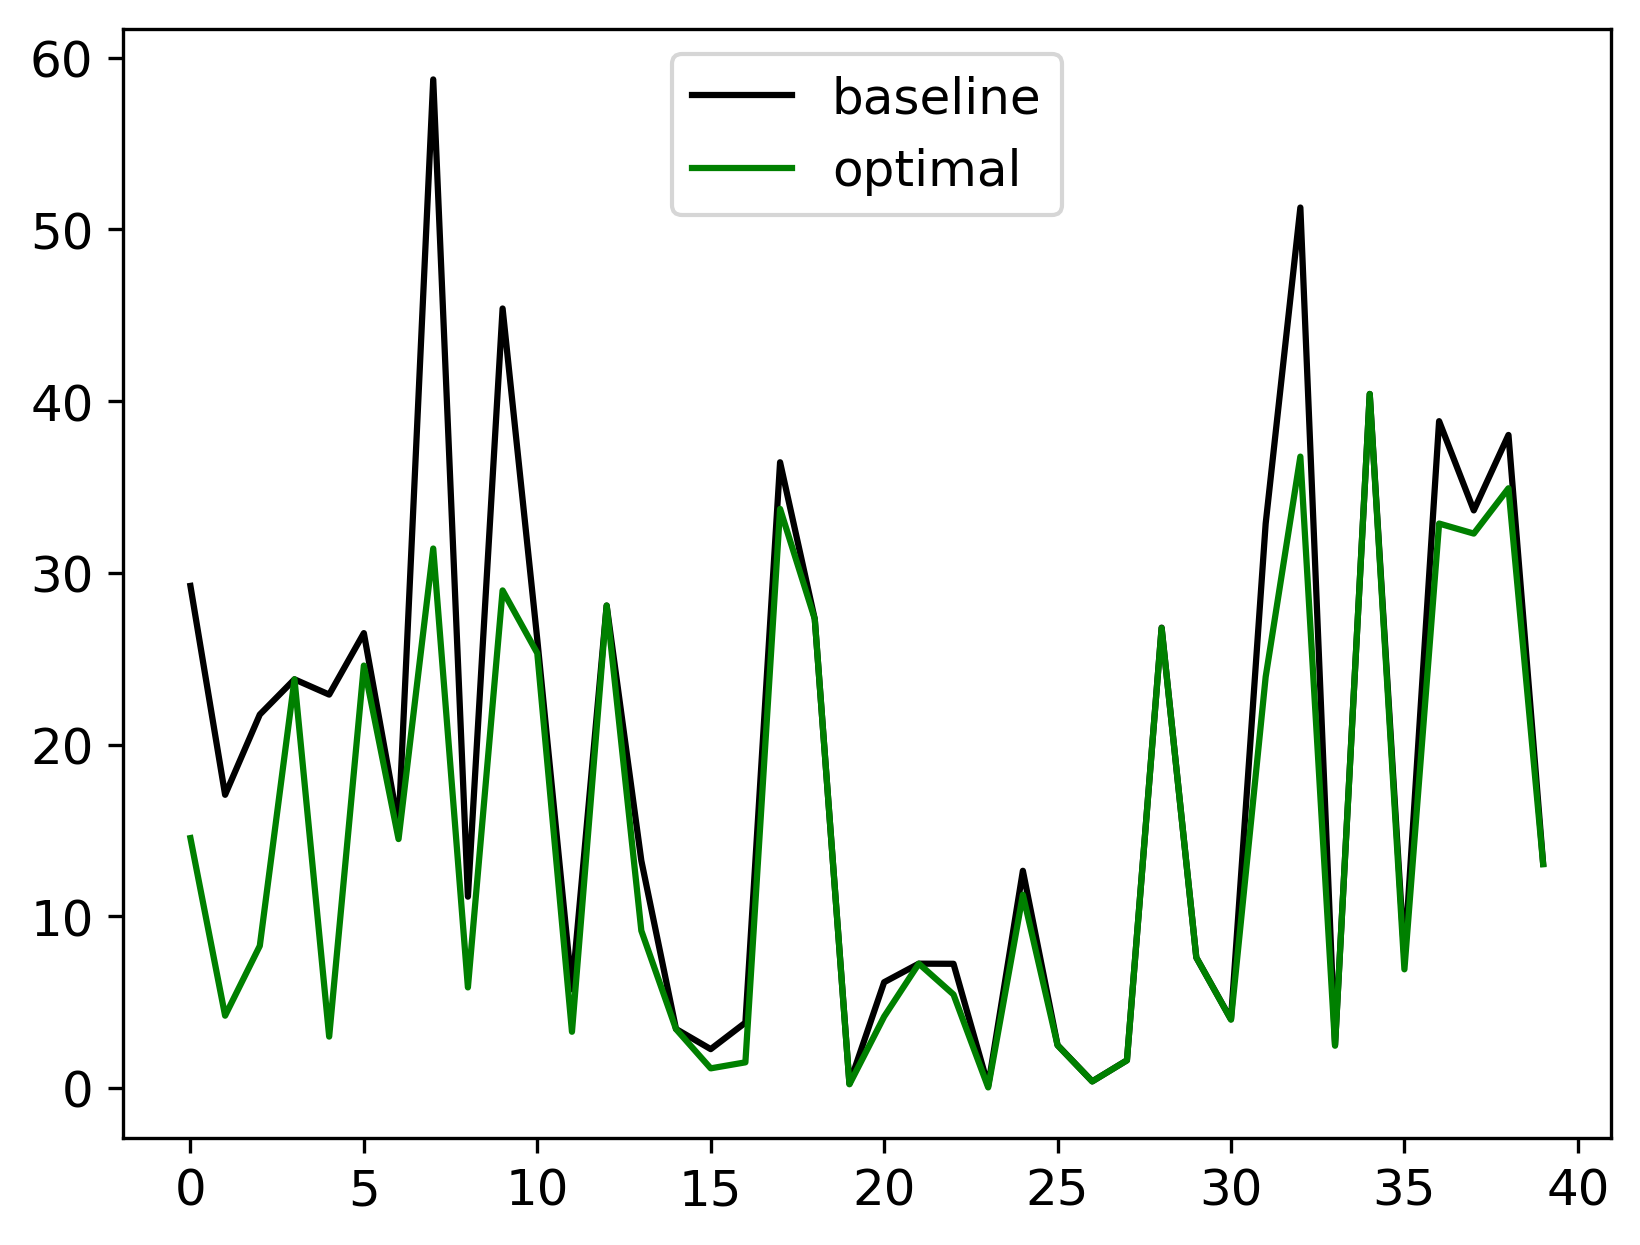

In [5]:
ax, fig = plt.subplots()

x = [x for x in range(len(baselines))]

plt.plot(x, baselines, label='baseline', color='black')
plt.plot(x, optimal, label='optimal', color='green')
plt.legend()

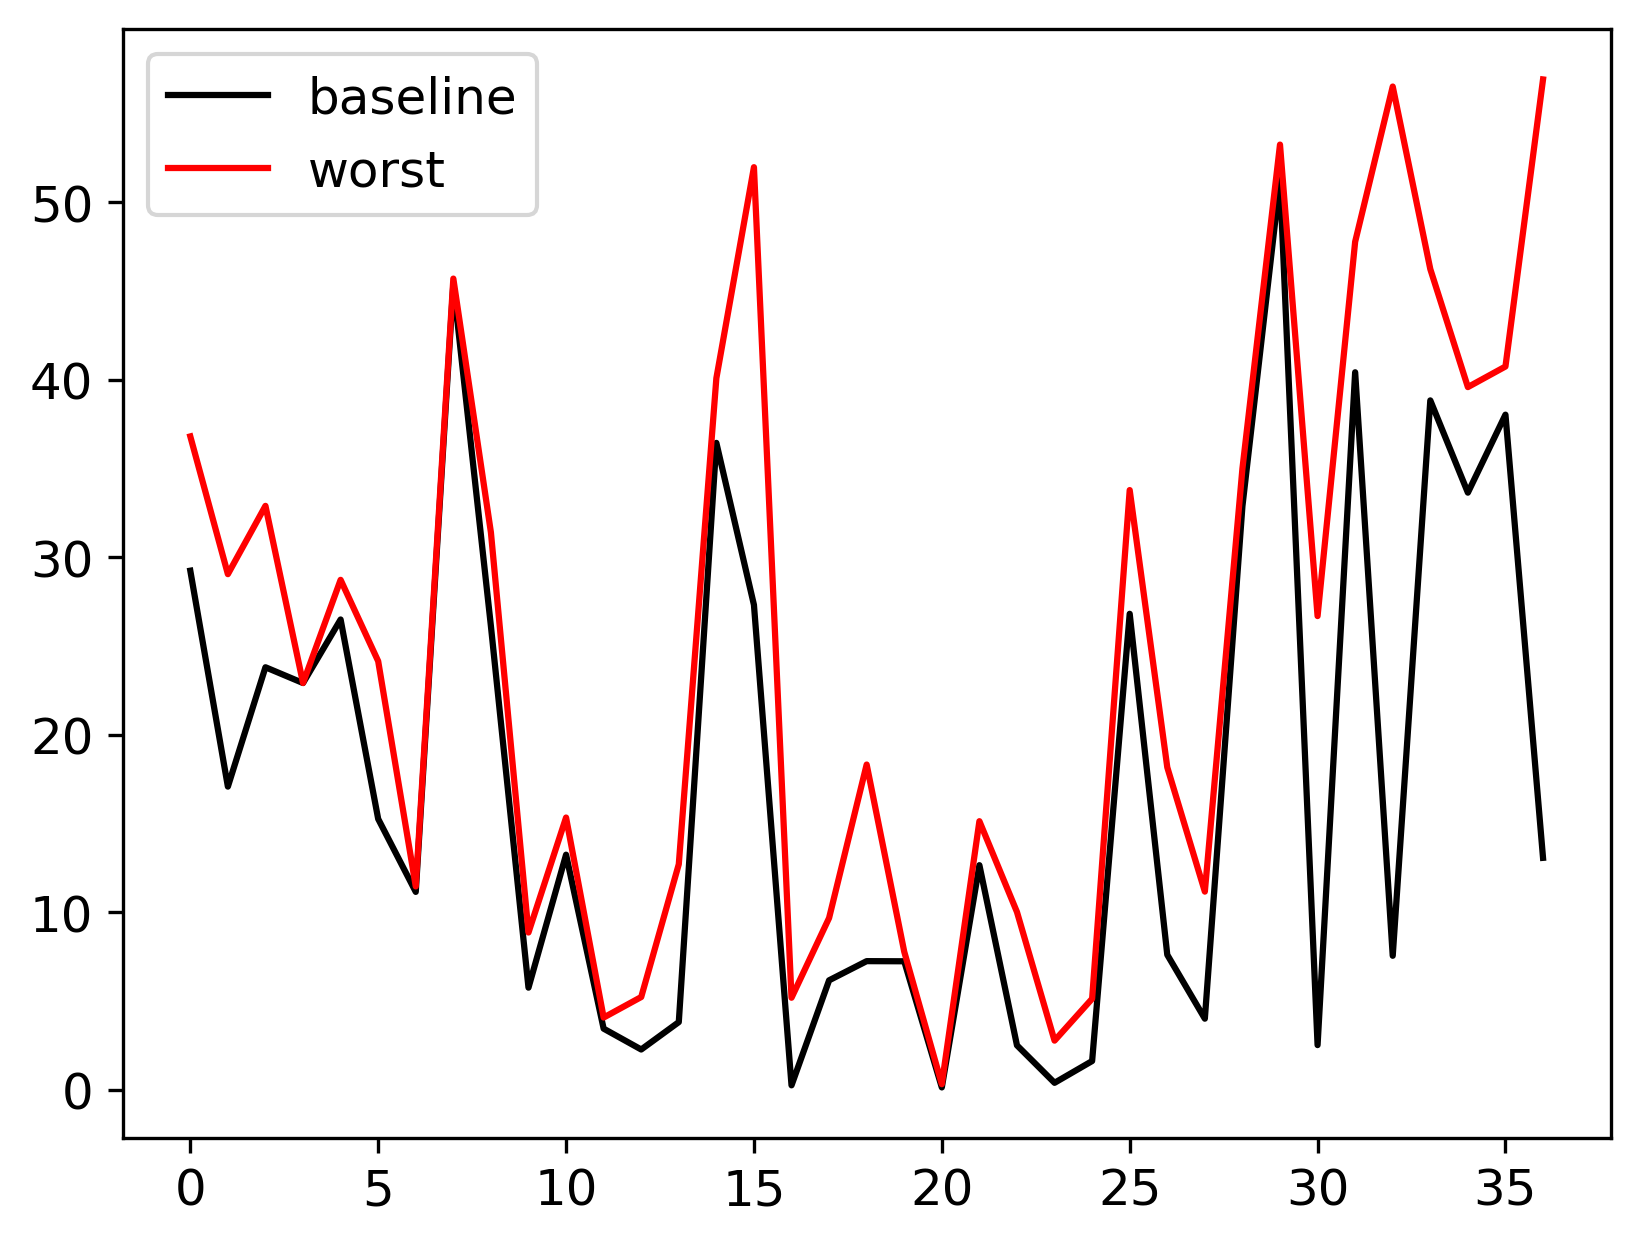

In [12]:
ax, fig = plt.subplots()

baseline_gaped, worst_gaped = [], []
for i in range(len(baselines)):
    if abs(baselines[i] - worst[i]) <= 100:
        baseline_gaped.append(baselines[i])
        worst_gaped.append(worst[i])
        
x = [x for x in range(len(baseline_gaped))]

plt.plot(x, baseline_gaped, label='baseline', color='black')
plt.plot(x, worst_gaped, label='worst', color='red')
plt.legend()

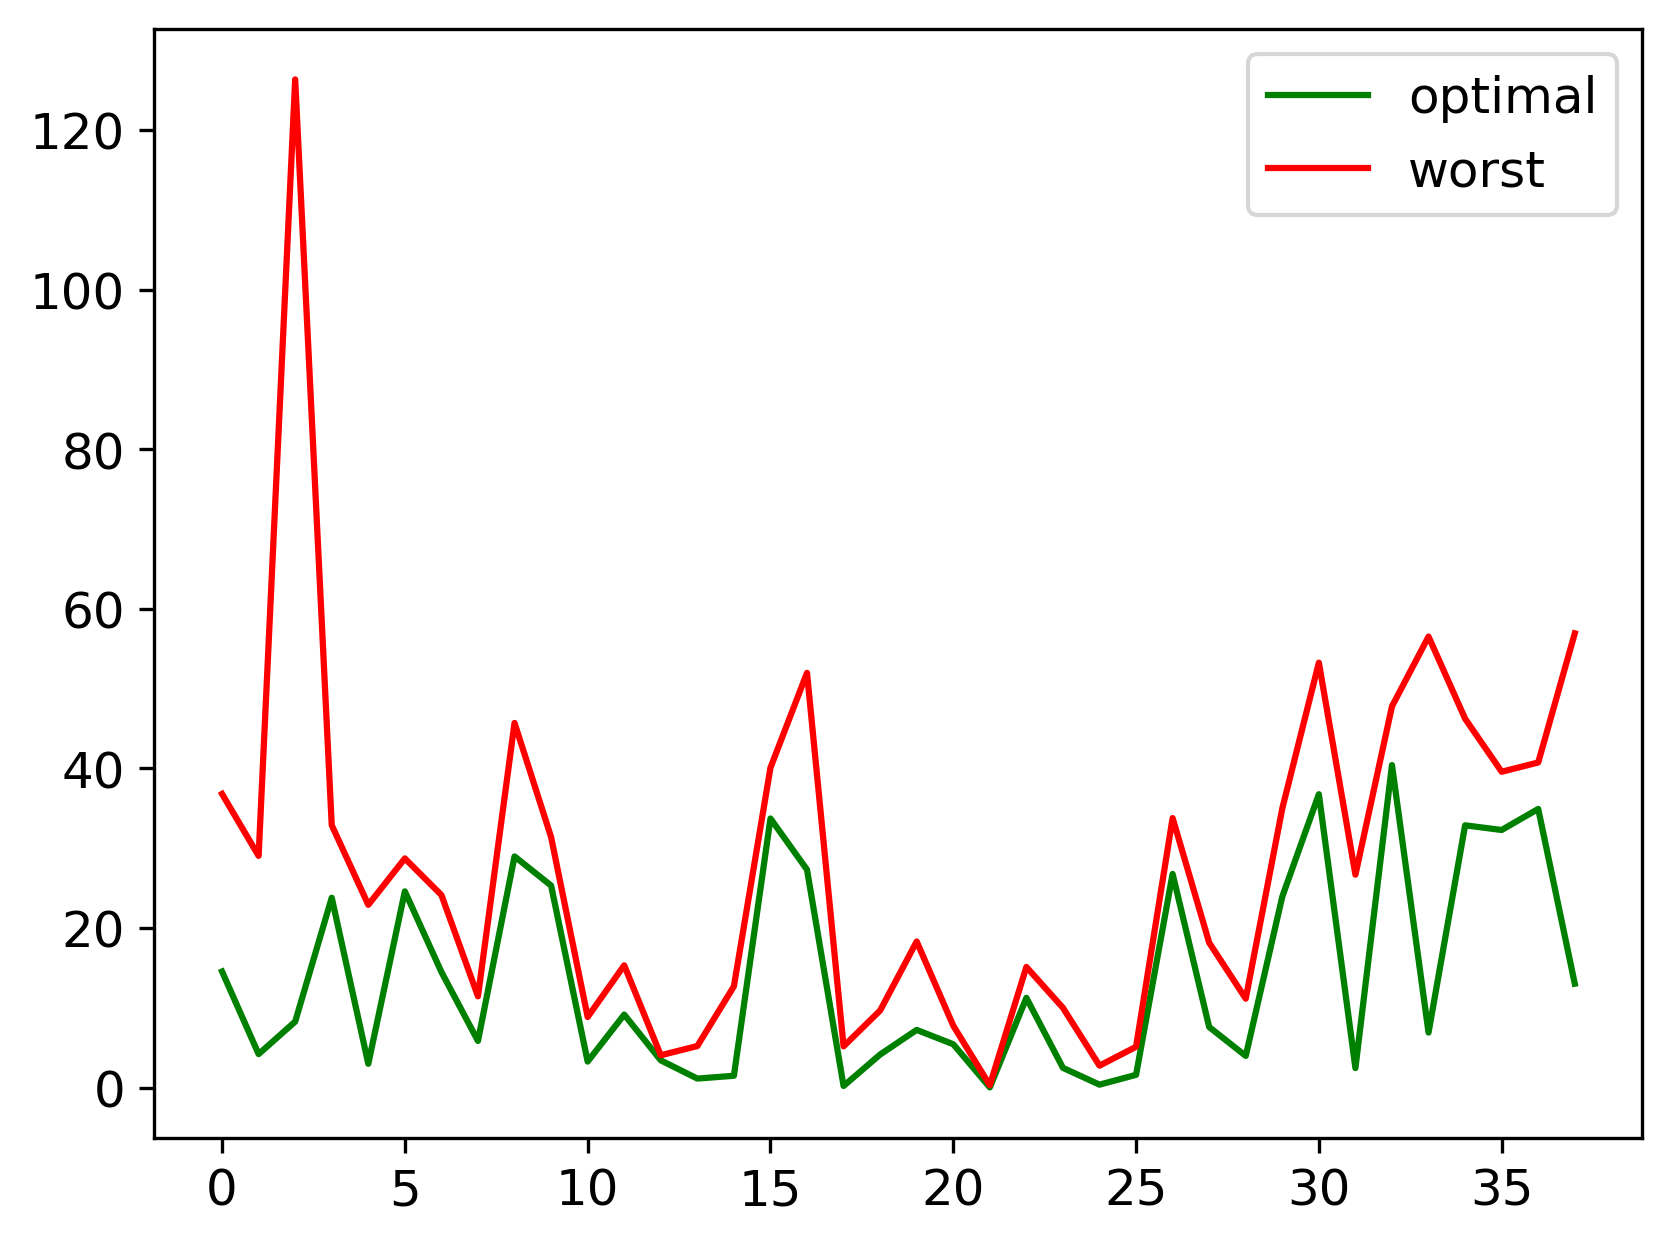

In [15]:
ax, fig = plt.subplots()

optimal_gaped, worst_gaped = [], []
for i in range(len(baselines)):
    if abs(optimal[i] - worst[i]) <= 200:
        worst_gaped.append(worst[i])
        optimal_gaped.append(optimal[i])
        
x = [x for x in range(len(worst_gaped))]

plt.plot(x, optimal_gaped, label='optimal', color='green')
plt.plot(x, worst_gaped, label='worst', color='red')
plt.legend()

In [8]:
indexes = []
for file in benchmark:
    curr_result = benchmark[file]
    temp_rts = []
    for i in range(len(curr_result)):
        temp = float(curr_result[i].split('|')[-1])
        temp_rts.append(temp)
    min_val = min(temp_rts)
    min_index = temp_rts.index(min_val)
    indexes.append(min_index)

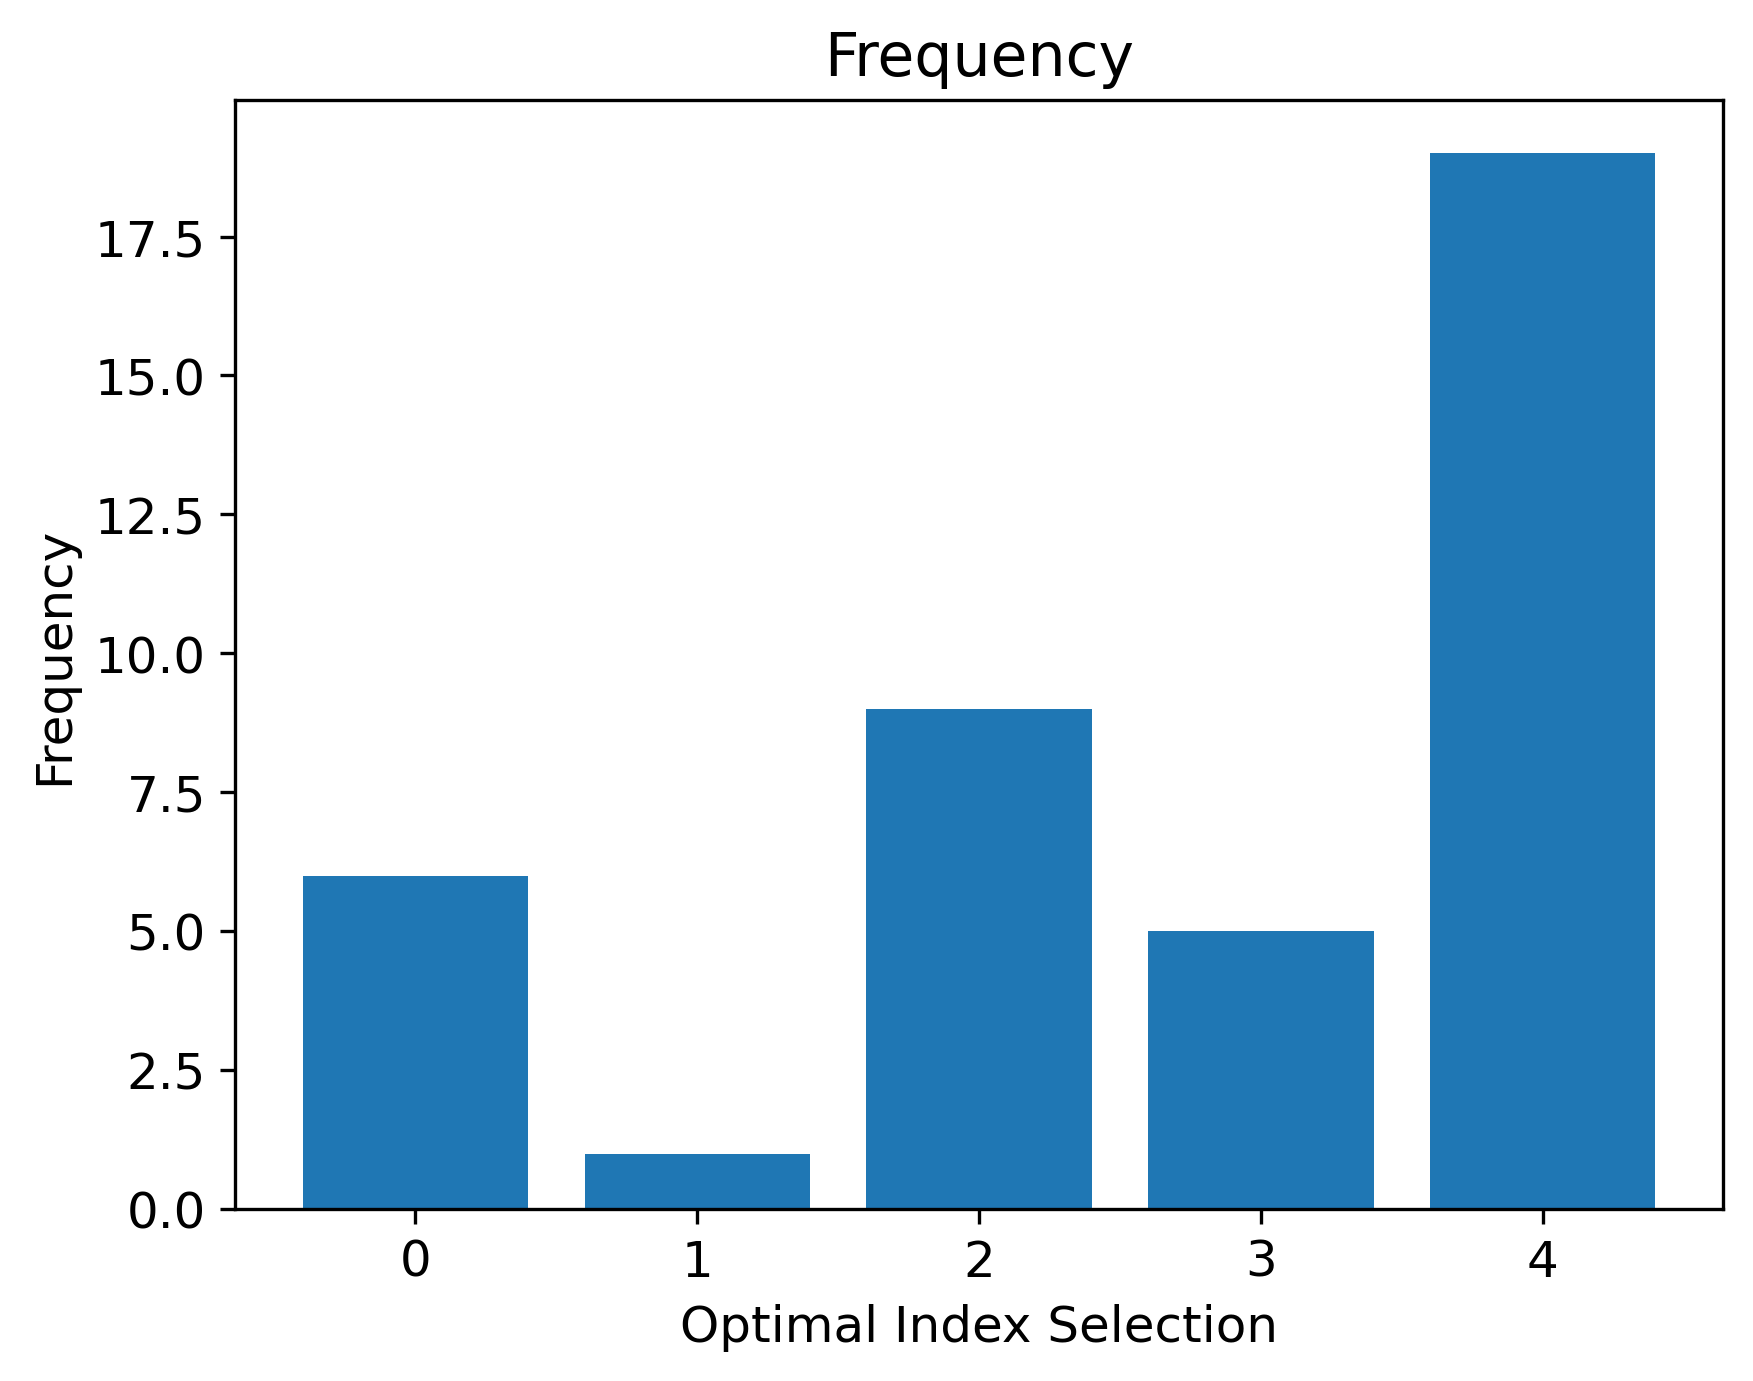

In [11]:
from collections import Counter
value_counts = Counter(indexes)
# Prepare data for the plot
categories = [0, 1, 2, 3, 4]  # Ensure all possible categories are included
frequencies = [value_counts.get(category, 0) for category in categories]

# Create the bar chart
plt.bar(categories, frequencies, tick_label=categories)
plt.xlabel('Optimal Index Selection')
plt.ylabel('Frequency')
plt.title('Frequency')
plt.show()